In [1]:
library(devtools)
library(dplyr)
library(future)
library(ggplot2)
library(qs)
library(Seurat)
library(tibble)
library(tidyr)


Loading required package: usethis


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


qs 0.25.7

Attaching SeuratObject



In [3]:
load("DLSclusters.Robj")
seurat_obj_v3 = UpdateSeuratObject(seurat.obj)
seurat_obj_v3_no_vglut = qread("DLSclusters_no_vglut.qs")

Updating from v2.X to v3.X

Validating object structure

Updating object slots

Ensuring keys are in the proper structure

Ensuring feature names don't have underscores or pipes

Object representation is consistent with the most current Seurat version



In [ ]:
seurat_obj_v3 = Seurat::NormalizeData(object=seurat_obj_v3) %>%
    FindVariableFeatures() %>% 
    ScaleData() %>% 
    RunPCA(verbose=F) %>% 
    FindNeighbors(dims = 1:30) %>%
    FindClusters(resolution = 0.6) %>%
    RunTSNE(dims = 1:30,verbose=F)

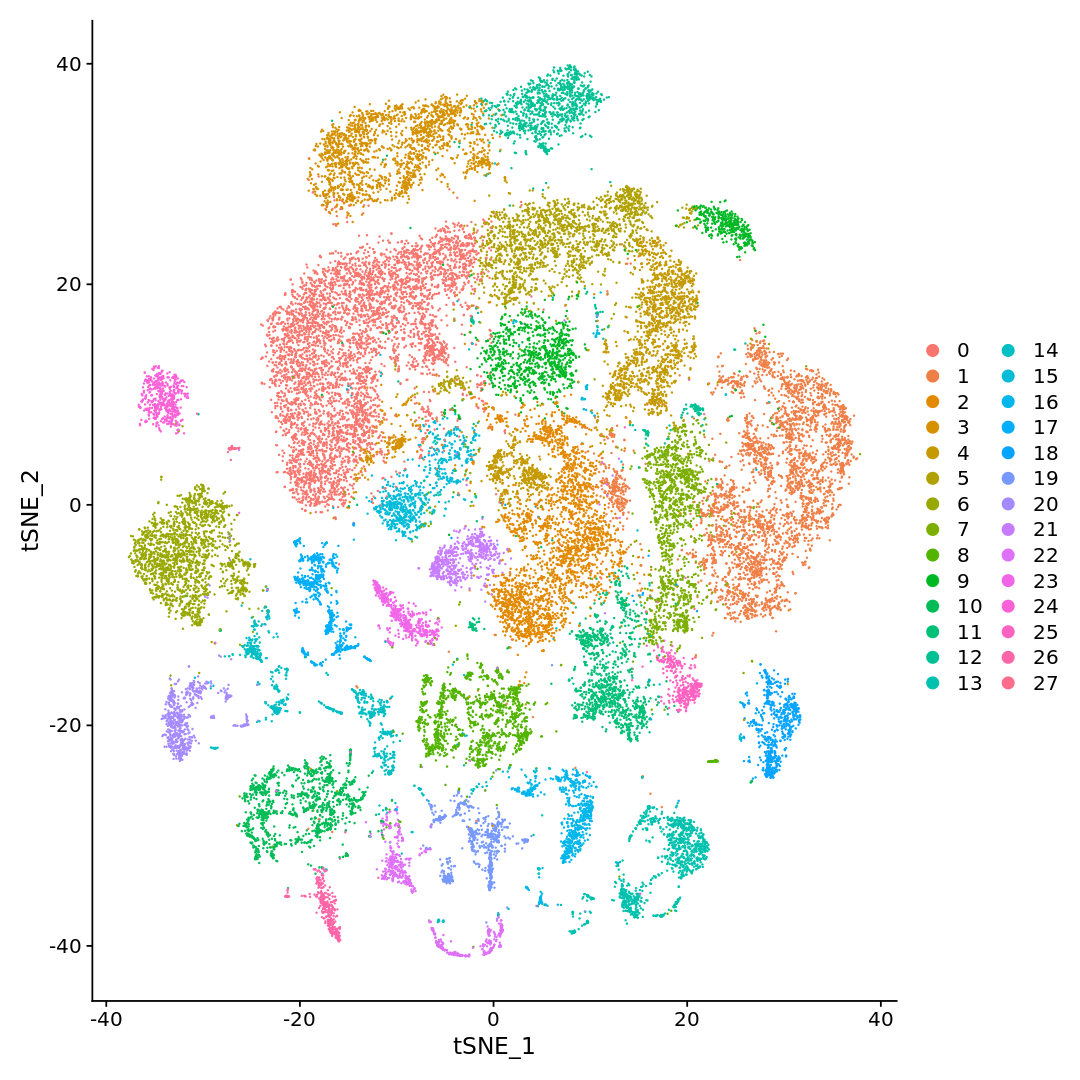

In [5]:
options(repr.plot.width=9, repr.plot.height=9)
DimPlot(seurat_obj_v3, reduction = "tsne" )

In [4]:
seurat_obj_v3_no_vglut = seurat_obj_v3[, as.numeric(seurat_obj_v3$RNA["Slc17a7", ]) == 0]
seurat_obj_v3_no_vglut = Seurat::NormalizeData(object=seurat_obj_v3_no_vglut) %>%
    FindVariableFeatures() %>% 
    ScaleData() %>% 
    RunPCA(verbose=F) %>% 
    FindNeighbors(dims = 1:30) %>%
    FindClusters(resolution = 0.6) %>%
    RunTSNE(dims = 1:30,verbose=F)
qsave(seurat_obj_v3_no_vglut, file="DLSclusters_no_vglut.qs")

Centering and scaling data matrix

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 32449
Number of edges: 1310672

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9240
Number of communities: 30
Elapsed time: 7 seconds


In [2]:
seurat_obj_v3_no_vglut = qread("DLSclusters_no_vglut.qs")

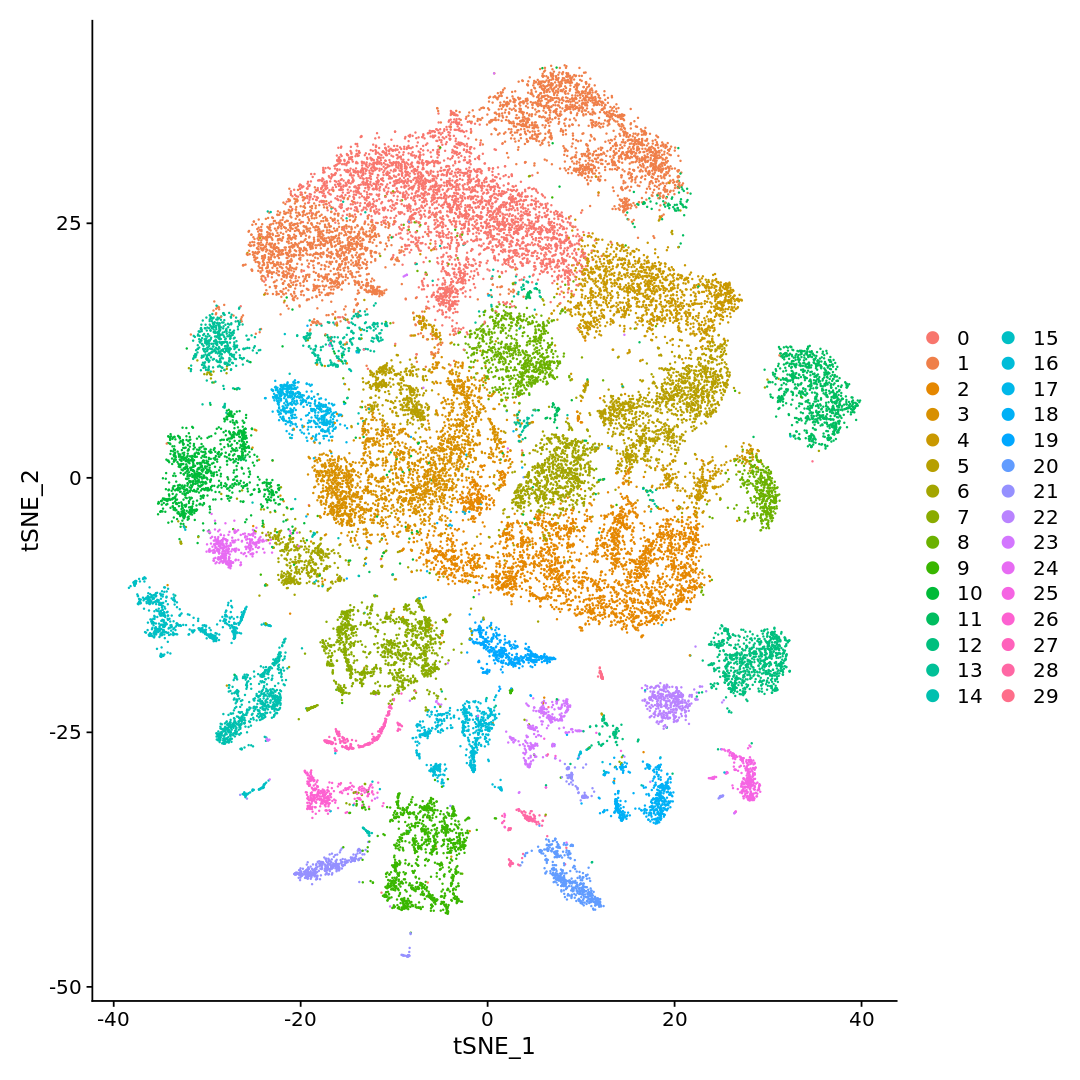

In [5]:
options(repr.plot.width=9, repr.plot.height=9)
DimPlot(seurat_obj_v3_no_vglut, reduction = "tsne")

In [7]:
# clusterlabel is called `RNA_snn_res.0.6`

# Number of cells?
print(paste0("Number of Cells Not Expressing Slc17a7: ", 
    ncol(seurat_obj_v3_no_vglut)))

# How many clusters?
print(paste0("Number of Clusters For Cells Not Expressing Slc17a7: ", 
    length(unique(seurat_obj_v3_no_vglut$RNA_snn_res.0.6))))

# Number of NeuN+ vs. NeuN-?
print(paste0("Number of NeuN+ Cells Not Expressing Slc17a7: ", 
    sum(seurat_obj_v3_no_vglut$RNA["Rbfox3", ] > 0)))

print(paste0("Number of NeuN- Cells Not Expressing Slc17a7: ", 
    sum(seurat_obj_v3_no_vglut$RNA["Rbfox3", ] == 0)))

# Number of cells that express glial markers
# AQP4 and GFAP are two common Astrocytic markers
# C1qa and Sall1 are Microglial markers
# Olig2 is an OPC marker
# MOG and Olig1 are Oligodendrocyte markers

print(paste0("Number of GFAP+ Cells Not Expressing Slc17a7: ", 
    sum(seurat_obj_v3_no_vglut$RNA["Gfap", ] > 0)))

print(paste0("Number of AQP4+ Cells Not Expressing Slc17a7: ", 
    sum(seurat_obj_v3_no_vglut$RNA["Aqp4", ] > 0)))

print(paste0("Number of C1QA+ Cells Not Expressing Slc17a7: ", 
    sum(seurat_obj_v3_no_vglut$RNA["C1qa", ] > 0)))

print(paste0("Number of SALL1+ Cells Not Expressing Slc17a7: ", 
    sum(seurat_obj_v3_no_vglut$RNA["Sall1", ] > 0)))

print(paste0("Number of OLIG2+ Cells Not Expressing Slc17a7: ", 
    sum(seurat_obj_v3_no_vglut$RNA["Olig2", ] > 0)))

print(paste0("Number of OLIG1+ Cells Not Expressing Slc17a7: ", 
    sum(seurat_obj_v3_no_vglut$RNA["Olig1", ] > 0)))

print(paste0("Number of MOG+ Cells Not Expressing Slc17a7: ", 
    sum(seurat_obj_v3_no_vglut$RNA["Mog", ] > 0)))

# Number of cells that express our neuropeptides of interest (Sst, Pdyn, etc.)
print(paste0("Number of SST+ Cells Not Expressing Slc17a7: ", 
    sum(seurat_obj_v3_no_vglut$RNA["Sst", ] > 0)))

print(paste0("Number of VIP+ Cells Not Expressing Slc17a7: ", 
    sum(seurat_obj_v3_no_vglut$RNA["Vip", ] > 0)))

print(paste0("Number of PDYN+ Cells Not Expressing Slc17a7: ", 
    sum(seurat_obj_v3_no_vglut$RNA["Pdyn", ] > 0)))


[1] "Number of Cells Not Expressing Slc17a7: 32449"
[1] "Number of Clusters For Cells Not Expressing Slc17a7: 30"


[1] "Number of NeuN+ Cells Not Expressing Slc17a7: 14545"
[1] "Number of NeuN- Cells Not Expressing Slc17a7: 17904"
[1] "Number of GFAP+ Cells Not Expressing Slc17a7: 553"
[1] "Number of AQP4+ Cells Not Expressing Slc17a7: 669"
[1] "Number of C1QA+ Cells Not Expressing Slc17a7: 331"
[1] "Number of SALL1+ Cells Not Expressing Slc17a7: 431"
[1] "Number of OLIG2+ Cells Not Expressing Slc17a7: 626"
[1] "Number of OLIG1+ Cells Not Expressing Slc17a7: 1289"
[1] "Number of MOG+ Cells Not Expressing Slc17a7: 1503"
[1] "Number of SST+ Cells Not Expressing Slc17a7: 4419"
[1] "Number of VIP+ Cells Not Expressing Slc17a7: 161"
[1] "Number of PDYN+ Cells Not Expressing Slc17a7: 312"


In [8]:
# Top/unique genes to each cluster (violin plots for each cluster)

# Instead of finding *unique* genes for each cluster (which could be due to noise),
# instead find significantly upregulated genes in each cluster

# IF WRITING

# save as a csv

# plan(strategy = "multicore", workers = 12)

# # Find all markers; adjust parameters as needed
# # This can take a few minutes....
# latsep_markers = FindAllMarkers(
#     seurat_obj_v3_no_vglut, 
#     only.pos=TRUE)

# # save latsep_markers as a csv
# write.csv(latsep_markers, file="/mnt/accessory/seq_data/latsep/latsep_markers_no_vglut.csv")

# top_markers = latsep_markers %>% 
    # group_by(cluster) %>% 
    # top_n(10, avg_log2FC) %>%
    # mutate(rank_within_group = row_number())
# write.csv(top_markers, file="/mnt/accessory/seq_data/latsep/latsep_markers_no_vglut_top_10.csv")

# IF READING
latsep_markers = read.csv("/mnt/accessory/seq_data/latsep/latsep_markers_no_vglut.csv")
latsep_markers_top10 = read.csv("/mnt/accessory/seq_data/latsep/latsep_markers_no_vglut_top_10.csv")
latsep_markers_top1 = read.csv("/mnt/accessory/seq_data/latsep/latsep_markers_no_vglut_top_1.csv")

In [26]:
latsep_markers_top1 = latsep_markers %>% 
    group_by(cluster) %>% 
    top_n(1, avg_log2FC)
write.csv(latsep_markers_top1, file="/mnt/accessory/seq_data/latsep/latsep_markers_no_vglut_top_1.csv")

In [27]:

cell_cluster = data.frame(
    cell_id = colnames(seurat_obj_v3_no_vglut@assays$RNA@data),
    cluster_id = seurat_obj_v3_no_vglut$RNA_snn_res.0.6
)

# make a csv where each row contains a cell-x-gene pair
# with columns cell_id, cluster_id, gene_name, and expression
# do this for all cells, but only for the top positive marker gene for each cluster

norm_expr = (
    seurat_obj_v3_no_vglut@assays$RNA@data[unique(latsep_markers_top1$gene), ]
    %>% as.data.frame()
)

norm_expr_long = (
    norm_expr
    %>% rownames_to_column("gene_name")
    %>% gather(key=cell_id, value="gene_expression", -gene_name)
)

output_df = (
    norm_expr_long
    %>% inner_join(cell_cluster, by="cell_id")
    %>% select(cell_id, cluster_id, gene_name, gene_expression)
    # order by cluster_id, then by gene_name, then by cell_id
    %>% arrange(cluster_id, gene_name, cell_id)
)


In [23]:
write.csv(output_df, file="/mnt/accessory/seq_data/latsep/latsep_cell_by_top_gene_expression.csv")

In [24]:
dim(output_df)

[1] 6489800       4

In [10]:
sessionInfo()

R version 4.0.4 (2021-02-15)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Debian GNU/Linux 11 (bullseye)

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/blas/libblas.so.3.9.0
LAPACK: /usr/lib/x86_64-linux-gnu/lapack/liblapack.so.3.9.0

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] SeuratObject_4.1.4 Seurat_4.4.0       future_1.33.0      dplyr_1.1.4       
[5] devtools_2.4.5     usethis_2.2.2     

loaded via a namespace (and not attached):
  [1] Rtsne_0.17             colorspace_2.1-0       deldir_2.0-2          
  [4] ellipsis_0.3.2         ggridges_0.5.4         IRdisplay_1.1        

In [39]:
# NeuN (Rbfox3)
p1=FeaturePlot(seurat_obj_v3_no_vglut, "Rbfox3", reduction = "tsne") + ggtitle('NeuN Expression')

# Sst 
p2=FeaturePlot(seurat_obj_v3_no_vglut, "Sst", reduction = "tsne") + ggtitle('Sst Expression')

# Pdyn
p3=FeaturePlot(seurat_obj_v3_no_vglut, "Pdyn", reduction = "tsne") + ggtitle('Pdyn Expression')

# Penk
p4=FeaturePlot(seurat_obj_v3_no_vglut, "Penk", reduction = "tsne") + ggtitle('Penk Expression')

# Nts
p5=FeaturePlot(seurat_obj_v3_no_vglut, "Nts", reduction = "tsne") + ggtitle('Nts Expression')

#Npy
p6=FeaturePlot(seurat_obj_v3_no_vglut, "Npy", reduction = "tsne") + ggtitle('Npy Expression')

ggsave(filename = "neun.svg", plot = p1, device = "svg")
ggsave(filename = "sst.svg", plot = p2, device = "svg")
ggsave(filename = "pdyn.svg", plot = p3, device = "svg")
ggsave(filename = "penk.svg", plot = p4, device = "svg")
ggsave(filename = "nts.svg", plot = p5, device = "svg")
ggsave(filename = "npy.svg", plot = p6, device = "svg")

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


In [41]:
# number of cells total
print(paste0("Number of Cells: ", ncol(seurat_obj_v3_no_vglut)))

# number of cells expressing Sst, Pdyn, Penk, Npy, Nts
print(paste0("Number of Cells Expressing Sst: ", sum(seurat_obj_v3_no_vglut$RNA["Sst", ] > 0)))
print(paste0("Number of Cells Expressing Pdyn: ", sum(seurat_obj_v3_no_vglut$RNA["Pdyn", ] > 0)))
print(paste0("Number of Cells Expressing Penk: ", sum(seurat_obj_v3_no_vglut$RNA["Penk", ] > 0)))
print(paste0("Number of Cells Expressing Npy: ", sum(seurat_obj_v3_no_vglut$RNA["Npy", ] > 0)))
print(paste0("Number of Cells Expressing Nts: ", sum(seurat_obj_v3_no_vglut$RNA["Nts", ] > 0)))

# number of cells expressing their pairwise combinations
print(paste0("Number of Cells Expressing Sst and Pdyn: ", 
    sum(seurat_obj_v3_no_vglut$RNA["Sst", ] > 0 & seurat_obj_v3_no_vglut$RNA["Pdyn", ] > 0)))
print(paste0("Number of Cells Expressing Sst and Penk: ", sum(seurat_obj_v3_no_vglut$RNA["Sst", ] > 0 & seurat_obj_v3_no_vglut$RNA["Penk", ] > 0)))
print(paste0("Number of Cells Expressing Sst and Npy: ", sum(seurat_obj_v3_no_vglut$RNA["Sst", ] > 0 & seurat_obj_v3_no_vglut$RNA["Npy", ] > 0)))
print(paste0("Number of Cells Expressing Sst and Nts: ", sum(seurat_obj_v3_no_vglut$RNA["Sst", ] > 0 & seurat_obj_v3_no_vglut$RNA["Nts", ] > 0)))
print(paste0("Number of Cells Expressing Pdyn and Penk: ", sum(seurat_obj_v3_no_vglut$RNA["Pdyn", ] > 0 & seurat_obj_v3_no_vglut$RNA["Penk", ] > 0)))
print(paste0("Number of Cells Expressing Pdyn and Npy: ", sum(seurat_obj_v3_no_vglut$RNA["Pdyn", ] > 0 & seurat_obj_v3_no_vglut$RNA["Npy", ] > 0)))
print(paste0("Number of Cells Expressing Pdyn and Nts: ", sum(seurat_obj_v3_no_vglut$RNA["Pdyn", ] > 0 & seurat_obj_v3_no_vglut$RNA["Nts", ] > 0)))
print(paste0("Number of Cells Expressing Penk and Npy: ", sum(seurat_obj_v3_no_vglut$RNA["Penk", ] > 0 & seurat_obj_v3_no_vglut$RNA["Npy", ] > 0)))
print(paste0("Number of Cells Expressing Penk and Nts: ", sum(seurat_obj_v3_no_vglut$RNA["Penk", ] > 0 & seurat_obj_v3_no_vglut$RNA["Nts", ] > 0)))
print(paste0("Number of Cells Expressing Npy and Nts: ", sum(seurat_obj_v3_no_vglut$RNA["Npy", ] > 0 & seurat_obj_v3_no_vglut$RNA["Nts", ] > 0)))

# More combinations
# Sst+Pdyn+Nts, Sst+Penk+Pdyn, Pdyn but w/o Sst, Penk but w/o Sst, Nts but w/o Sst, Npy but w/o Sst, Pdyn but w/o Penk, Pdyn but w/o Nts
print(paste0("Number of Cells Expressing Sst, Pdyn, and Nts: ", 
    sum(seurat_obj_v3_no_vglut$RNA["Sst", ] > 0 & seurat_obj_v3_no_vglut$RNA["Pdyn", ] > 0 & seurat_obj_v3_no_vglut$RNA["Nts", ] > 0)))
print(paste0("Number of Cells Expressing Sst, Penk, and Pdyn: ", 
    sum(seurat_obj_v3_no_vglut$RNA["Sst", ] > 0 & seurat_obj_v3_no_vglut$RNA["Penk", ] > 0 & seurat_obj_v3_no_vglut$RNA["Pdyn", ] > 0)))
print(paste0("Number of Cells Expressing Pdyn but w/o Sst: ", 
    sum(seurat_obj_v3_no_vglut$RNA["Pdyn", ] > 0 & seurat_obj_v3_no_vglut$RNA["Sst", ] == 0)))
print(paste0("Number of Cells Expressing Penk but w/o Sst: ", 
    sum(seurat_obj_v3_no_vglut$RNA["Penk", ] > 0 & seurat_obj_v3_no_vglut$RNA["Sst", ] == 0)))
print(paste0("Number of Cells Expressing Nts but w/o Sst: ", 
    sum(seurat_obj_v3_no_vglut$RNA["Nts", ] > 0 & seurat_obj_v3_no_vglut$RNA["Sst", ] == 0)))
print(paste0("Number of Cells Expressing Npy but w/o Sst: ", 
    sum(seurat_obj_v3_no_vglut$RNA["Npy", ] > 0 & seurat_obj_v3_no_vglut$RNA["Sst", ] == 0)))
print(paste0("Number of Cells Expressing Pdyn but w/o Penk: ", 
    sum(seurat_obj_v3_no_vglut$RNA["Pdyn", ] > 0 & seurat_obj_v3_no_vglut$RNA["Penk", ] == 0)))
print(paste0("Number of Cells Expressing Pdyn but w/o Nts: ", 
    sum(seurat_obj_v3_no_vglut$RNA["Pdyn", ] > 0 & seurat_obj_v3_no_vglut$RNA["Nts", ] == 0)))
print(paste0("Number of Cells Expressing Pdyn and Oprk1: ", 
    sum(seurat_obj_v3_no_vglut$RNA["Pdyn", ] > 0 & seurat_obj_v3_no_vglut$RNA["Pdyn", ] > 0 & seurat_obj_v3_no_vglut$RNA["Oprk1", ] > 0)))



[1] "Number of Cells: 32449"
[1] "Number of Cells Expressing Sst: 4419"
[1] "Number of Cells Expressing Pdyn: 312"
[1] "Number of Cells Expressing Penk: 1382"
[1] "Number of Cells Expressing Npy: 505"
[1] "Number of Cells Expressing Nts: 768"
[1] "Number of Cells Expressing Sst and Pdyn: 70"
[1] "Number of Cells Expressing Sst and Penk: 278"
[1] "Number of Cells Expressing Sst and Npy: 177"
[1] "Number of Cells Expressing Sst and Nts: 199"
[1] "Number of Cells Expressing Pdyn and Penk: 11"
[1] "Number of Cells Expressing Pdyn and Npy: 1"
[1] "Number of Cells Expressing Pdyn and Nts: 6"
[1] "Number of Cells Expressing Penk and Npy: 21"
[1] "Number of Cells Expressing Penk and Nts: 65"
[1] "Number of Cells Expressing Npy and Nts: 7"
[1] "Number of Cells Expressing Sst, Pdyn, and Nts: 3"
[1] "Number of Cells Expressing Sst, Penk, and Pdyn: 3"
[1] "Number of Cells Expressing Pdyn but w/o Sst: 242"
[1] "Number of Cells Expressing Penk but w/o Sst: 1104"
[1] "Number of Cells Expressing Nts b

In [87]:
# 	All Sst
#	All Pdyn
#	All Nts
#	All Penk
#	All Npy 

# 	Pdyn levels in Pdyn+Sst cells vs. Pdyn levels in Pdyn w/o Sst
# Nts levels in Nts+Sst vs. Nts levels in Nts w/o Sst
#	Pdyn levels in Pdyn+Penk cells vs. Pdyn levels in Pdyn w/o Penk 
#	Penk levels in Pdyn+Penk cells vs. Penk levels in Pdyn w/o Penk

subsets = list()

subsets[["Sst"]] = seurat_obj_v3_no_vglut[, (seurat_obj_v3_no_vglut$RNA@counts["Sst", ] > 0)]
subsets[["Pdyn"]] = seurat_obj_v3_no_vglut[, (seurat_obj_v3_no_vglut$RNA@counts["Pdyn", ] > 0)]
subsets[["Nts"]] = seurat_obj_v3_no_vglut[, (seurat_obj_v3_no_vglut$RNA@counts["Nts", ] > 0)]
subsets[["Penk"]] = seurat_obj_v3_no_vglut[,(seurat_obj_v3_no_vglut$RNA@counts["Penk", ] > 0)]
subsets[["Npy"]] = seurat_obj_v3_no_vglut[, (seurat_obj_v3_no_vglut$RNA@counts["Npy", ] > 0)]

genes = c("Sst", "Pdyn", "Nts", "Penk", "Npy")



In [90]:
subsets[["Pdyn_Sst"]] = seurat_obj_v3_no_vglut[, (seurat_obj_v3_no_vglut$RNA@counts["Pdyn", ] > 0 & seurat_obj_v3_no_vglut$RNA@counts["Sst", ] > 0)]
subsets[["Pdyn_no_Sst"]] = seurat_obj_v3_no_vglut[,(seurat_obj_v3_no_vglut$RNA@counts["Pdyn", ] > 0 & seurat_obj_v3_no_vglut$RNA@counts["Sst", ] == 0)]
subsets[["Nts_Sst"]] = seurat_obj_v3_no_vglut[, (seurat_obj_v3_no_vglut$RNA@counts["Nts", ] > 0 & seurat_obj_v3_no_vglut$RNA@counts["Sst", ] > 0)]
subsets[["Nts_no_Sst"]] = seurat_obj_v3_no_vglut[,(seurat_obj_v3_no_vglut$RNA@counts["Nts", ] > 0 & seurat_obj_v3_no_vglut$RNA@counts["Sst", ] == 0)]
subsets[["Pdyn_Penk"]] = seurat_obj_v3_no_vglut[, (seurat_obj_v3_no_vglut$RNA@counts["Pdyn", ] > 0 & seurat_obj_v3_no_vglut$RNA@counts["Penk", ] > 0)]
subsets[["Pdyn_no_Penk"]] = seurat_obj_v3_no_vglut[, (seurat_obj_v3_no_vglut$RNA@counts["Pdyn", ] > 0 & seurat_obj_v3_no_vglut$RNA@counts["Penk", ] == 0)]


In [91]:
# create a dataframe that is length of genes x length of subsets
raw_subset_expr = data.frame(
    gene = rep(genes, each=length(subsets)),
    subset = rep(names(subsets), times=length(genes)),
    expression = NA
)

scaled_subset_expr = data.frame(
    gene = rep(genes, each=length(subsets)),
    subset = rep(names(subsets), times=length(genes)),
    expression = NA
)

In [92]:
for (name in names(subsets)) {
    for (gene in genes) {
        raw_subset_expr[
            raw_subset_expr$gene == gene & raw_subset_expr$subset == name, 
            "expression"
        ] = mean(subsets[[name]]$RNA@counts[gene, ])

        scaled_subset_expr[
            scaled_subset_expr$gene == gene & scaled_subset_expr$subset == name, 
            "expression"
        ] = mean(subsets[[name]]$RNA@data[gene, ])
    }
}

In [98]:
write.csv(raw_subset_expr, file="/mnt/accessory/seq_data/latsep/latsep_raw_subset_expr.csv")
write.csv(scaled_subset_expr, file="/mnt/accessory/seq_data/latsep/latsep_scaled_subset_expr.csv")

In [105]:
sum(seurat_obj_v3_no_vglut$gene_binary == 'expressing')

[1] 4419

In [115]:
predefined_markers = list()

for (gene in genes) {
  print(gene)
  # Create a binary factor for cells expressing the gene vs. not expressing it
  seurat_obj_v3_no_vglut[["gene_binary"]] <- ifelse(
    seurat_obj_v3_no_vglut[["RNA"]]@counts[gene, ] > 0, 
    paste0("expressing_", gene),
    paste0("not_expressing", gene)
)

  seurat_obj_v3_no_vglut = SetIdent(
    object = seurat_obj_v3_no_vglut, 
    value = "gene_binary")

  
  # Find markers for cells expressing the gene
  markers <- FindMarkers(
    seurat_obj_v3_no_vglut, 
    ident.1 = paste0("expressing_", gene), 
    ident.2 = paste0("not_expressing", gene))
  
  # Get the top 10 genes by avg_log2FC
  top_genes <- head(markers[order(-markers$avg_log2FC), ], 10)
  
  # Store the results
  predefined_markers[[gene]] <- top_genes

  # Save the results
  write.csv(top_genes, file=paste0("/mnt/accessory/seq_data/latsep/latsep_", gene, "_markers.csv"))

}

[1] "Sst"
[1] "Pdyn"
[1] "Nts"
[1] "Penk"
[1] "Npy"
